In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 10. This question should be answered using the Weekly data set, which is part of the ISLR package. 
# This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 
# 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.


data = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/Weekly.csv')
print(data.shape)
data.head()

(1089, 9)


Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

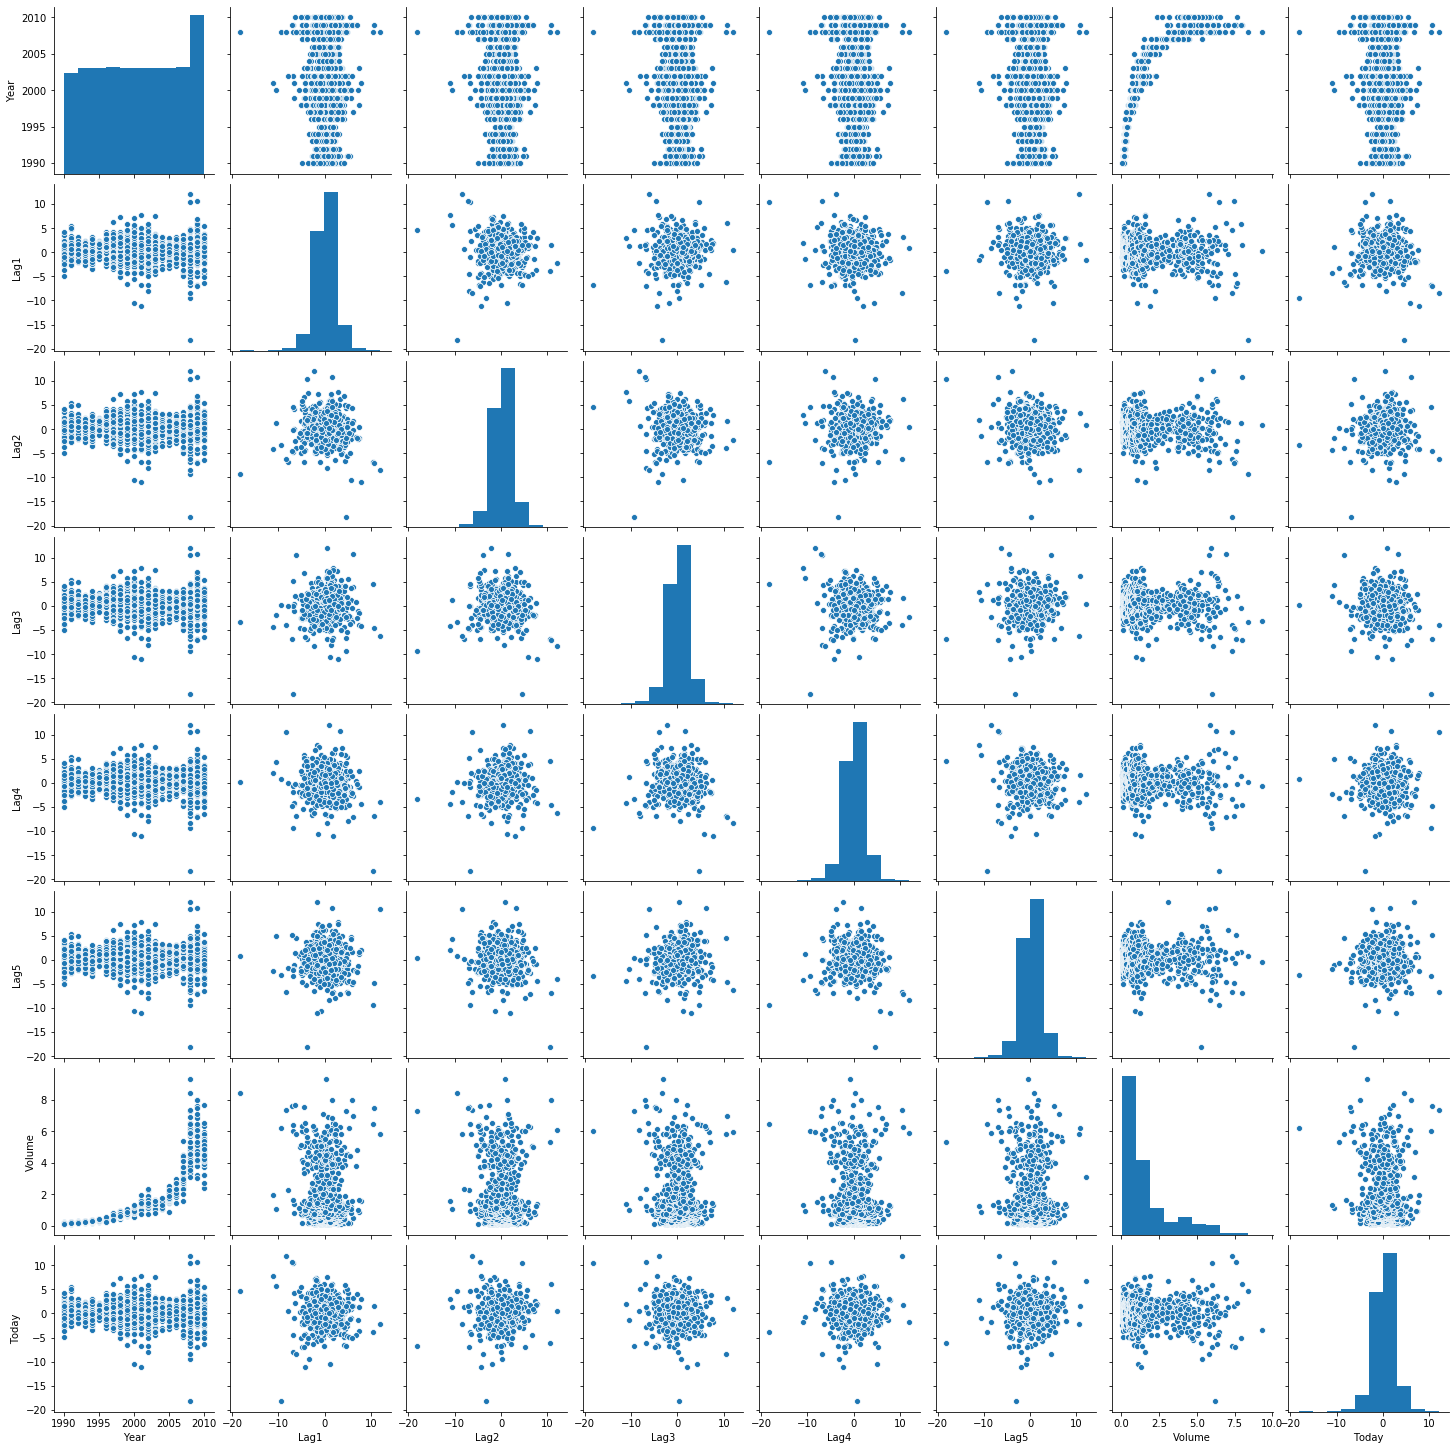

In [22]:
# (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

sns.pairplot(data)

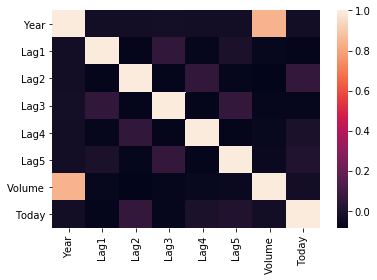

In [23]:
# correlation

corr = data.corr()
sns.heatmap(corr)

In [24]:
# Year and Volume appear to have a relationship, no other patterns are discernible

In [25]:
# (b) Use the full data set to perform a logistic regression with Direction as the response and the five 
# lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the 
# predictors appear to be statistically significant? If so, which ones?


data['Direction'] = data['Direction'].map({'Down':0, 'Up':1})


In [26]:
X = data.iloc[:,1:-2]
X = sm.add_constant(X)
y = data['Direction']

results = sm.Logit(y, X).fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:                0.006580
Time:                        10:37:44   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [27]:
# Observing the p values of the predictors, we can conclude that all the predictors except Lag2, are having a significant 
# p value.

In [28]:
# (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion 
# matrix is telling you about the types of mistakes made by logistic regression.

def analyze_confusion_matrix_and_acc(true, pred):
    cm = confusion_matrix(true, pred)
    temp = pd.DataFrame(cm, ['Down', 'Up'], ['Down', 'Up'])
    print(temp)
    print('')
    print(f"Total Actual Down values: {temp.iloc[0,:].sum()}")
    print(f"Total Actual Up values: {temp.iloc[1,:].sum()}")
    print(f"Total Predicted Down values: {temp.iloc[:,0].sum()}")
    print(f"Total Predicted Up values: {temp.iloc[:,1].sum()}")
    print('')
    
    print(f"% of up values in data: {temp.iloc[1,:].sum() / (temp.iloc[0,:].sum() + temp.iloc[1,:].sum())}")
    print(f"% of up values in prediction: {temp.iloc[:,1].sum() / (temp.iloc[:,1].sum() + temp.iloc[:,0].sum())}")
    
    print(f"\nThe accuracy is: {accuracy_score(true, pred)}")

In [29]:
pred = results.predict(X)
pred_classes = np.where(pred>0.5,1,0)

analyze_confusion_matrix_and_acc(data['Direction'],pred_classes)

      Down   Up
Down    54  430
Up      48  557

Total Actual Down values: 484
Total Actual Up values: 605
Total Predicted Down values: 102
Total Predicted Up values: 987

% of up values in data: 0.5555555555555556
% of up values in prediction: 0.90633608815427

The accuracy is: 0.5610651974288338


In [30]:
# Weeks the market goes up the logistic regression is right most of the time, 557/(557+48) = 92.1%. 
# Weeks the market goes up the logistic regression is wrong most of the time 54/(430+54) = 11.2%.

In [31]:
# (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as 
# the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the 
# held out data (that is, the data from 2009 and 2010)

train = data[data['Year'] <= 2008]
test = data[data['Year'] > 2008]

print(f'Shape of train is: {train.shape}')
print(f"Shape of test is: {test.shape}")

X_train = train['Lag2']
y_train = train['Direction']

X_test = test['Lag2']
y_test = test['Direction']


Shape of train is: (985, 9)
Shape of test is: (104, 9)


In [32]:
logit_reg = LogisticRegression().fit(X_train.to_frame(), y_train)

In [33]:
pred = logit_reg.predict(X_test.to_frame())

analyze_confusion_matrix_and_acc(y_test, pred)

      Down  Up
Down     9  34
Up       5  56

Total Actual Down values: 43
Total Actual Up values: 61
Total Predicted Down values: 14
Total Predicted Up values: 90

% of up values in data: 0.5865384615384616
% of up values in prediction: 0.8653846153846154

The accuracy is: 0.625


In [34]:
# (e) Repeat (d) using LDA.

lda = LDA().fit(X_train.to_frame(), y_train)

In [35]:
pred = lda.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test, pred)

      Down  Up
Down     9  34
Up       5  56

Total Actual Down values: 43
Total Actual Up values: 61
Total Predicted Down values: 14
Total Predicted Up values: 90

% of up values in data: 0.5865384615384616
% of up values in prediction: 0.8653846153846154

The accuracy is: 0.625


In [36]:
# (f) Repeat (d) using QDA.

qda =QDA()
qda.fit(X_train.to_frame(),y_train)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [37]:
pred = qda.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test,pred)

      Down  Up
Down     0  43
Up       0  61

Total Actual Down values: 43
Total Actual Up values: 61
Total Predicted Down values: 0
Total Predicted Up values: 104

% of up values in data: 0.5865384615384616
% of up values in prediction: 1.0

The accuracy is: 0.5865384615384616


In [38]:
#QDA is predicting every observation to be Up

In [39]:
# (g) Repeat (d) using KNN with K = 1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train.to_frame(),y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [40]:
pred = knn_1.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test,pred)

      Down  Up
Down    21  22
Up      31  30

Total Actual Down values: 43
Total Actual Up values: 61
Total Predicted Down values: 52
Total Predicted Up values: 52

% of up values in data: 0.5865384615384616
% of up values in prediction: 0.5

The accuracy is: 0.49038461538461536


In [41]:
# (h) Which of these methods appears to provide the best results on this data?

# Both the linear models logistic regerssion and lda are giving the best accuracy of 62.5%.

In [42]:
# (i) Experiment with different combinations of predictors, including possible transformations and interactions, 
# for each of the methods. Report the variables, method, and associated confusion matrix that appears to 
# provide the best results on the held out data. Note that you should also experiment with values for K in the 
# KNN classifier.


#lets add an interaction term of lag1*lag3
train = data[data['Year'] <= 2008]
test = data[data['Year'] > 2008]

train['interaction_term'] = train['Lag1']*train['Lag3']
test['interaction_term'] = test['Lag1']*train['Lag3']


X_train = train[['Lag2','interaction_term']]
y_train = train['Direction']

X_test = test[['Lag2','interaction_term']]
y_test = test['Direction']

/home/abhishek/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/abhishek/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [44]:
logit_reg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logit_reg.summary())

Optimization terminated successfully.
         Current function value: 0.684687
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:                0.004338
Time:                        10:37:46   Log-Likelihood:                -674.42
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.05296
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1994      0.064      3.095      0.002       0.073       0.326
Lag2       

In [45]:
# the p-value of interaction term being quite significant, we'll drop it.

In [46]:
X_train.drop('interaction_term',axis = 1,inplace = True)
X_test.drop('interaction_term',axis = 1,inplace = True)

/home/abhishek/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
neighbor_list = [i for i in range(1,10)]
neighbor_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [48]:
def run_knn(n_neighbors):
    acc_list = []
    for n in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        
        pred = knn.predict(X_test)
        acc_list.append(accuracy_score(y_test, pred))
    return acc_list

In [49]:
run_knn(neighbor_list)

[0.49038461538461536,
 0.47115384615384615,
 0.5384615384615384,
 0.5769230769230769,
 0.5288461538461539,
 0.5288461538461539,
 0.5480769230769231,
 0.5384615384615384,
 0.5480769230769231]

In [50]:
# we get the max value at k=4, but it is still less than the linear models

In [51]:
# 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage 
# based on the Auto data set.


In [52]:
data = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/Auto.csv')
print(data.shape)
data.head()

(397, 9)


mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [53]:
# (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if 
# mpg contains a value below its median.

data['mpg01'] = np.where(data['mpg'] > data['mpg'].median(), 1, 0)

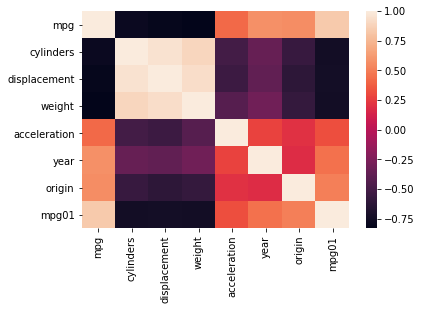

In [54]:
# (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. 
# Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may 
# be useful tools to answer this question. Describe your findings.

corr = data.corr()
sns.heatmap(corr)

In [55]:
#there is a strong correlation of mpg01 with ['cylinders','displacement','weight']

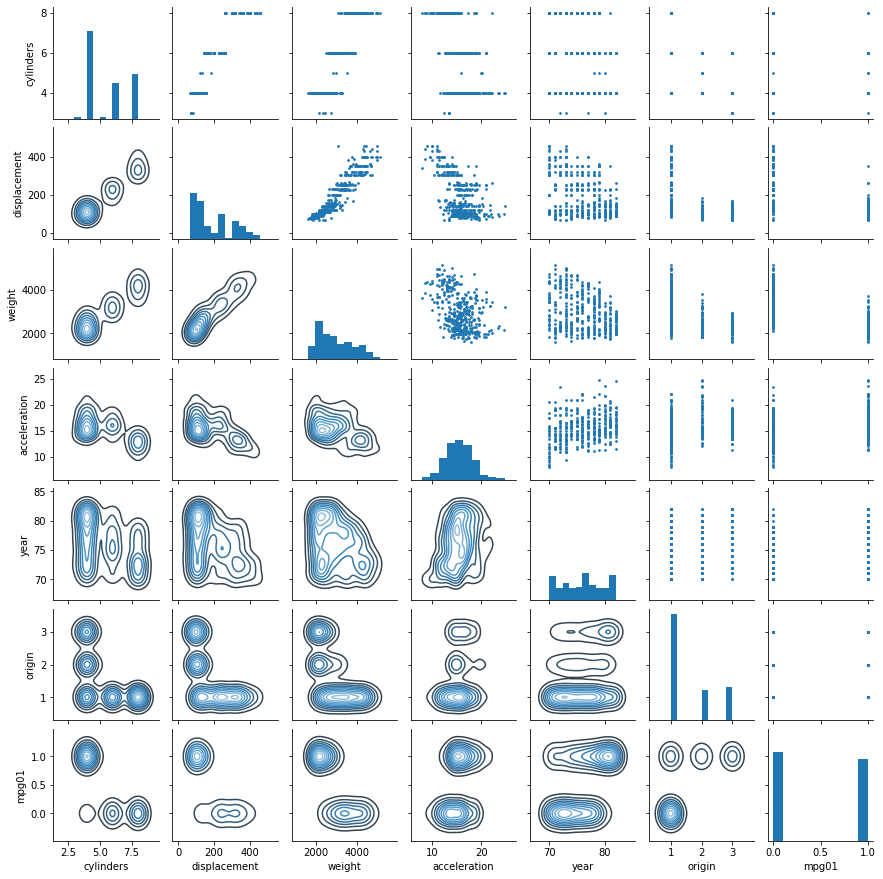

In [61]:
g = sns.PairGrid(data.drop('mpg', axis=1), size = 2)
g.map_upper(plt.scatter, s = 3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.fig.set_size_inches(12, 12)

In [62]:
# (c) Split the data into a training set and a test set.

# we will only use cylinder, displacement and weight
X_train,X_test,y_train,y_test = train_test_split(data[['cylinders','displacement','weight']],data['mpg01'],test_size = 0.2)
print('Shape of training ',X_train.shape)
print('Shape of testing ',X_test.shape)

Shape of training  (317, 3)
Shape of testing  (80, 3)


In [63]:
# (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most 
# associated with mpg01 in (b). What is the test error of the model obtained?

lda = LDA().fit(X_train, y_train)

pred = lda.predict(X_test)

analyze_confusion_matrix_and_acc(y_test, pred)

      Down  Up
Down    33   6
Up       1  40

Total Actual Down values: 39
Total Actual Up values: 41
Total Predicted Down values: 34
Total Predicted Up values: 46

% of up values in data: 0.5125
% of up values in prediction: 0.575

The accuracy is: 0.9125


In [64]:
# (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most 
# associated with mpg01 in (b). What is the test error of the model obtained?

qda = QDA().fit(X_train, y_train)

pred = qda.predict(X_test)

analyze_confusion_matrix_and_acc(y_test, pred)

      Down  Up
Down    34   5
Up       2  39

Total Actual Down values: 39
Total Actual Up values: 41
Total Predicted Down values: 36
Total Predicted Up values: 44

% of up values in data: 0.5125
% of up values in prediction: 0.55

The accuracy is: 0.9125


In [65]:
# (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that 
# seemed most associated with mpg01 in (b). What is the test error of the model obtained?

lr = LogisticRegression().fit(X_train, y_train)

pred = lr.predict(X_test)

analyze_confusion_matrix_and_acc(y_test, pred)

      Down  Up
Down    34   5
Up       1  40

Total Actual Down values: 39
Total Actual Up values: 41
Total Predicted Down values: 35
Total Predicted Up values: 45

% of up values in data: 0.5125
% of up values in prediction: 0.5625

The accuracy is: 0.925


In [102]:
# (g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the 
# variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of 
# K seems to perform the best on this data set?

neighbor_list = [i for i in range(1, 50)]
# neighbor_list

In [103]:
acc = run_knn(neighbor_list)

In [104]:
df = pd.DataFrame({'N_neighbors': neighbor_list, 'Accuracy':acc})
df

N_neighbors  Accuracy
0             1    0.8625
1             2    0.8125
2             3    0.9125
3             4    0.8500
4             5    0.8875
5             6    0.9125
6             7    0.9125
7             8    0.9125
8             9    0.9250
9            10    0.9375
10           11    0.9250
11           12    0.9375
12           13    0.9250
13           14    0.9250
14           15    0.9125
15           16    0.9125
16           17    0.9125
17           18    0.9250
18           19    0.9250
19           20    0.9250
20           21    0.9375
21           22    0.9375
22           23    0.9375
23           24    0.9375
24           25    0.9375
25           26    0.9250
26           27    0.9375
27           28    0.9250
28           29    0.9375
29           30    0.9375
30           31    0.9375
31           32    0.9375
32           33    0.9375
33           34    0.9375
34           35    0.9375
35           36    0.9375
36           37    0.9375
37           38    0.9375
38           39    0.9375
39           40    0.9375
40           41    0.9375
41           42    0.9375
42           43    0.9375
43           44    0.9375
44           45    0.9375
45           46    0.9375
46           47    0.9500
47           48    0.9500
48           49    0.9500

In [89]:
df.max(axis=0)

N_neighbors    99.00
Accuracy        0.95
dtype: float64

In [105]:
idx = (df['Accuracy'] == 0.95).idxmax()
idx

46

In [ ]:
# Hence, Best value of K occurs for K = 47

In [106]:
# 13. Using the Boston data set, fit classification models in order to predict whether a given suburb has a 
# crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various 
# subsets of the predictors. Describe your findings.

